In [282]:
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Problem 1
Suppose your expectations regarding the stock price are as follows:
<div>
<img src="fig1.png" width="500"/>
</div>
Compute the mean and standard deviation of the HPR on stocks.

In [260]:
ps, rs = np.asarray([0.35, 0.30, 0.35]), np.asarray([.3,.1,-.1])
expected_return = np.sum(ps*rs)
var = np.sum(ps*(rs - expected_return)**2)
print(f"E(r) = {expected_return:.2f}, Variance = {var:.3f}")

E(r) = 0.10, Variance = 0.028


# Problem 2 
Visit Professor Kenneth French’s data library Web site: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html and download the monthly returns
of “Fama/French 3 Factors” from January 1927–December 2022. Split the sample in half.
For each of the market (Mkt-RF) factor, small minus big (SML) factor, and high minus low
(HML) factor for the two halves, plot the histogram of the monthly returns, and compute:

•average 

•SD

•skew

•kurtosis

•1% value at risk (VaR)

•1% expected shortfall (ES)

Do the three split-halves statistics suggest to you that returns come from the same distribution over the entire period?

In [261]:
# Reading in cleaned up data
df = pd.read_csv('data_adj.csv')

# Converting date number to date object
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: '/'.join((str(x)[4:], str(x)[:4]))), format="%m/%Y")

# Splitting data into two halves 
left, right = df.iloc[:len(df)//2], df.iloc[len(df)//2:]

In [283]:
def avg(x):
    return np.mean(x)
def sd(x):
    return np.std(x)
def skew(x):
    return sp.stats.skew(x)
def kurtosis(x):
    return sp.stats.kurtosis(x)
def var(x, quantile=0.01):
    return np.quantile(x, quantile)
def es(x, quantile=0.01):
    q = var(x, quantile)
    return x[x < q].mean() 

dicts = {}
for ret in ['Mkt-RF', 'SMB', 'HML']:
    d = {}
    d['avg'] = avg(df[ret])
    d['sd'] = sd(df[ret])
    d['skew'] = skew(df[ret])
    d['kurtosis'] = kurtosis(df[ret])
    d['var'] = var(df[ret])
    d['es'] = es(df[ret])
    dicts[ret] = d
pprint(dicts)

{'HML': {'avg': 0.3607858376511226,
         'es': -10.407499999999999,
         'kurtosis': 18.32400247183842,
         'sd': 3.5609429221375772,
         'skew': 2.102909565990127,
         'var': -8.324300000000001},
 'Mkt-RF': {'avg': 0.6677461139896373,
            'es': -19.596666666666668,
            'kurtosis': 7.405388730270316,
            'sd': 5.351127915045177,
            'skew': 0.16005631601295556,
            'var': -13.5644},
 'SMB': {'avg': 0.1892832469775475,
         'es': -8.766363636363637,
         'kurtosis': 18.72725119595776,
         'sd': 3.167970384991889,
         'skew': 1.8453938366441638,
         'var': -6.64}}


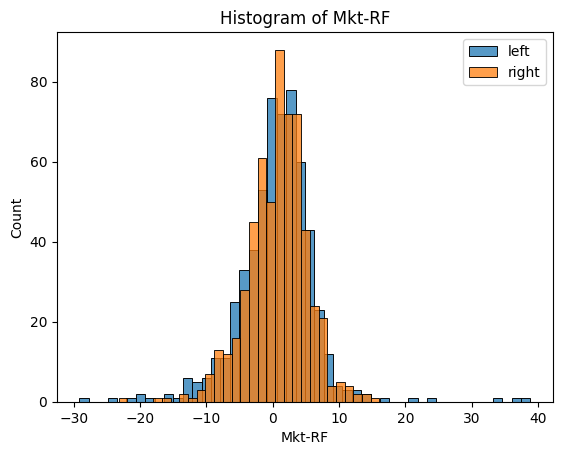

In [ ]:
# Market RF
sns.histplot(data=left, x='Mkt-RF', label='left')
sns.histplot(data=right, x='Mkt-RF', label='right')
plt.title("Histogram of Mkt-RF")
plt.legend()
plt.show()

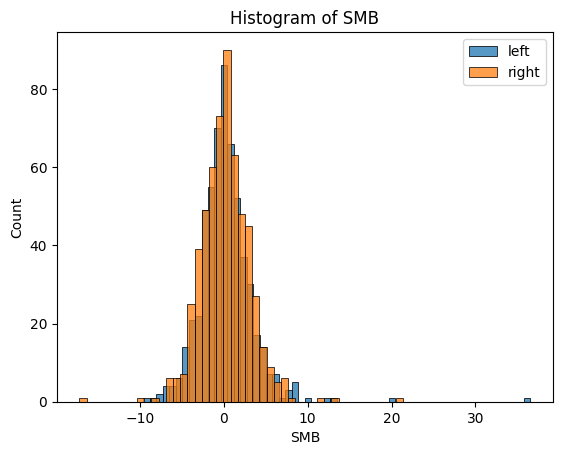

In [ ]:
# SML
sns.histplot(data=left, x='SMB', label='left')
sns.histplot(data=right, x='SMB', label='right')
plt.title("Histogram of SMB")
plt.legend()
plt.show()

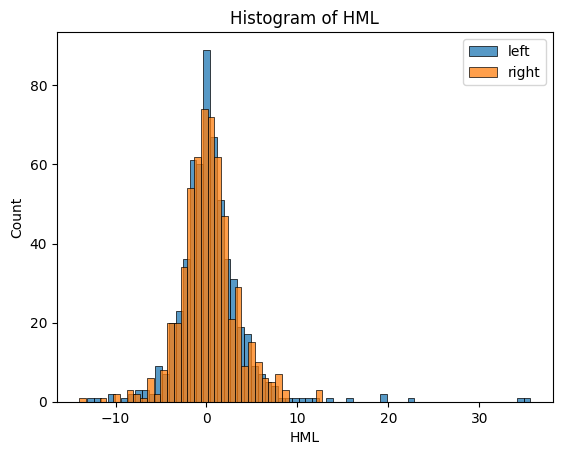

In [ ]:
# SML
sns.histplot(data=left, x='HML', label='left')
sns.histplot(data=right, x='HML', label='right')
plt.title("Histogram of HML")
plt.legend()
plt.show()

# Problem 4
A pension fund manager is considering three mutual funds. The first is a stock fund, the
second is a long-term bond fund, and the third is a money market fund that provides a safe
return of 5%. The characteristics of the risky funds are as follows:

Expected Return Standard Deviation

Stock fund (S) 20% 30%

Bond fund (B) 10% 10%

The correlation between the fund returns is .20.

(a) [4pts] What are the investment proportions in the minimum-variance portfolio of the
two risky funds, and what are the expected value and standard deviation of its rate of
return?

(b) [4pts] Tabulate and draw the investment opportunity set of the two risky funds. Use
investment proportions for the stock fund of 0% to 100% in increments of 10%.

(c) [4pts] Draw a tangent from the risk-free rate to the opportunity set. What does your
graph show for the expected return and standard deviation of the optimal portfolio?

(d) [4pts] Solve numerically for the proportions of each asset and for the expected return
and standard deviation of the optimal risky portfolio.

(e) [4pts] What is the Sharpe ratio of the best feasible CAL?

(f) [6pts] You require that your portfolio yield an expected return of 12%, and that it be
efficient, that is, on the steepest feasible CAL.

•[3pts] What is the standard deviation of your portfolio?

•[3pts] What is the proportion invested in the money market fund and each of the
two risky funds?

(g) [4pts] If you were to use only the two risky funds and still require an expected return
of 12%, what would be the investment proportions of your portfolio? Compare its
standard deviation to that of the optimized portfolio in (f). What do you conclude?

In [284]:
s_ret = .2
s_sd = .3
b_ret = .1
b_sd = .1
corr = .2
rf = .05

In [302]:
cov = corr * s_sd * b_sd
w_d = ((s_sd)**2 - cov) / (s_sd**2 + b_sd**2 - 2*cov)
w_e = 1 - w_d
p_ret = s_ret*w_e + b_ret*w_d
p_var= w_d**2 * b_sd**2 + w_e**2 * s_sd**2 + 2 * w_d * w_e * cov

In [315]:
rets, vari = [], []
for i in range(0, 110, 10):
    w_d = i / 100
    w_e = 1 - w_d
    p_ret = s_ret*w_e + b_ret*w_d
    p_var= w_d**2 * b_sd**2 + w_e**2 * s_sd**2 + 2 * w_d * w_e * cov
    rets.append(p_ret), vari.append(p_var)


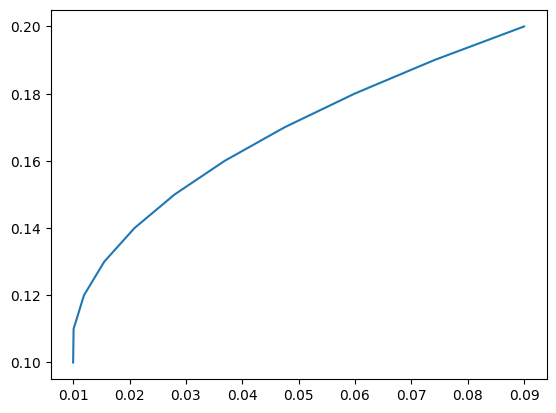

In [326]:
sns.lineplot(x=vari, y=rets)
plt.show()

In [368]:
errors = []
for _ in range(100000):
    xs = np.random.choice([1,2,4,5], size=15)
    ys = []
    for x in xs:
        if x == 1:
            y = np.random.normal(100, np.sqrt(500))
        if x == 2:
            y = np.random.normal(120, np.sqrt(500))
        if x == 4:
            y = np.random.normal(200, np.sqrt(500))
        if x == 5:
            y = np.random.normal(220, np.sqrt(500))
        ys.append(y)
    one_more_x = np.random.choice([1,2,4,5])
    if one_more_x == 1:
        one_more_y = np.random.normal(100, np.sqrt(500))
    if one_more_x == 2:
        one_more_y= np.random.normal(120, np.sqrt(500))
    if one_more_x == 4:
        one_more_y = np.random.normal(200, np.sqrt(500))
    if one_more_x == 5:
        one_more_y = np.random.normal(220, np.sqrt(500))
    pool = [i[1] for i in zip(xs,ys) if i[0] in list(range(one_more_x-1, one_more_x+2))]
    if len(pool) > 0:
        pred = np.mean(pool)
    else:
        pred = np.mean(ys)

    errors.append((pred - np.mean(y))**2)
np.mean(errors)

5605.877373743542